In [1]:
import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse

# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import G, F, K, Genv, Fenv, Kenv
from pointpats import PoissonPointProcess

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/ho

In [6]:
cen = gpd.read_file('../Data/AulaDensidade/Censo2010/SetorCenso2010.shp')

In [7]:
cen.head(3)

,CODSETO,TIPO,SITUA1,SITUA2,NOMEMUN,NOMEDIS,NOMESUB,NOMEBAI,AreaKm2,Dst_CBDs,...,DPPER_P,DPPCB_P,DPPLC_P,DPPLSL_,PpAnl_P,RndMdRs,RspPb_P,TmpDs00,PrfDC00,geometry
0,354680105000078,Normal,Zona rural exclusive aglomerado rural,RURAL,SANTA ISABEL,SANTA ISABEL,SANTA ISABEL,SANTA ISABEL (TODOS OS SETORES),9.737017,57.545339,...,0.157895,1.0,0.726316,0.726316,0.295597,752.50000,0.073684,NaN,NaN,"POLYGON ((382175.269 7426336.991, 382177.703 7..."
1,354680105000077,Normal,Zona rural exclusive aglomerado rural,RURAL,SANTA ISABEL,SANTA ISABEL,SANTA ISABEL,SANTA ISABEL (TODOS OS SETORES),12.745168,57.436747,...,0.000000,1.0,0.771084,0.108434,0.174419,820.97561,0.518072,NaN,NaN,"POLYGON ((382175.269 7426336.991, 381853.827 7..."
2,354680105000076,Normal,Zona rural exclusive aglomerado rural,RURAL,SANTA ISABEL,SANTA ISABEL,SANTA ISABEL,SANTA ISABEL (TODOS OS SETORES),19.374664,56.416090,...,0.000000,1.0,1.000000,0.021978,0.191781,812.97619,0.087912,NaN,NaN,"POLYGON ((381593.498 7429836.577, 381441.003 7..."


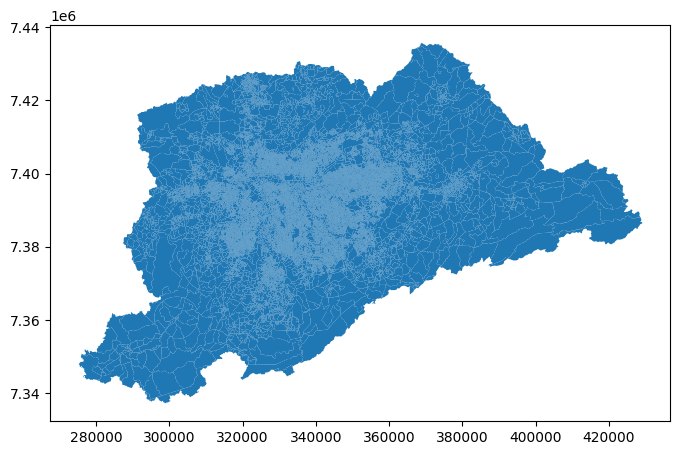

In [8]:
cen.plot(figsize=(8, 8));

In [9]:
ap_cen = cen[cen['NOMEDIS'] == 'ALTO DE PINHEIROS']

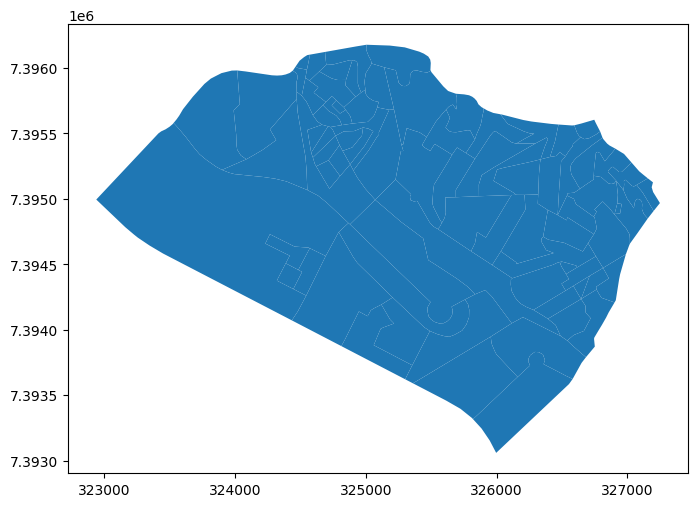

In [10]:
ap_cen.plot(figsize=(8, 8));

In [11]:
ctx_area_verde = gpd.read_file('../Data/AulaDensidade/Contexto/AreasVerdes/AreasVerdesSPL_SIRGAS.shp')
ctx_rios = gpd.read_file('../Data/AulaDensidade/Contexto/CorposDeAgua/RiosPrincipais.shp')
ctx_represas = gpd.read_file('../Data/AulaDensidade/Contexto/CorposDeAgua/RepresasNivelMaximo_SIRGAS.shp')
ctx_rede_ruas = gpd.read_file('../Data/AulaDensidade/Contexto/RedeRuas/RedeRuasSPL_SIRGAS.shp')

In [12]:
ap_cen.columns

Index(['CODSETO', 'TIPO', 'SITUA1', 'SITUA2', 'NOMEMUN', 'NOMEDIS', 'NOMESUB',
       'NOMEBAI', 'AreaKm2', 'Dst_CBDs', 'Rfr_CBDs', 'Dist_CBD', 'Refr_CBD',
       'Domic', 'DPP', 'DPPCasa', 'DPPApt', 'DPPQuit', 'DPPAqui', 'DPPAlug',
       'DPPAbsR', 'DPPEsgR', 'DPPEsgF', 'DPPSmBn', 'DPPCmBn', 'DPPLxCl',
       'DPPLxSL', 'DPI', 'Pop', 'PopAlfa', 'RndTtlR', 'RspCmRn', 'Resp',
       'RspMSlr', 'Pop_Dns', 'Pop_Dmc', 'Dmc_Dns', 'DPP_Dns', 'DPI_Dns',
       'DPPCs_P', 'DPPAp_P', 'DPPAl_P', 'DPPQt_P', 'DPPAR_P', 'DPPER_P',
       'DPPCB_P', 'DPPLC_P', 'DPPLSL_', 'PpAnl_P', 'RndMdRs', 'RspPb_P',
       'TmpDs00', 'PrfDC00', 'geometry'],
      dtype='object')

In [17]:
vert = gpd.read_file('../Data/AulaDensidade/Verticalizacao/PrediosMSP_geolocalizados.shp')

In [18]:
vert.head(3)

,Place_addr,Postal,X,Y,NUMERO_UNI,AREA_DO_TE,AREA_OCUPA,AREA_CONST,ANO_DA_CON,QUANTIDADE,TIPO_DE_PA,Periodo,NOMEDIS,geometry
0,"São Paulo, 03007",03007,-46.794534,-23.89663,2.0,785.0,600.0,323.0,1960.0,28.0,Comercial vertical - padrao B,1962.0,MARSILAC,POINT (317310.296 7356058.682)
1,"São Paulo, 03007",03007,-46.794534,-23.89663,1.0,785.0,600.0,84.0,1960.0,28.0,Comercial vertical - padrao B,1962.0,MARSILAC,POINT (317310.296 7356058.682)
2,"São Paulo, 03007",03007,-46.794534,-23.89663,1.0,296.0,260.0,127.0,1949.0,4.0,Comercial vertical - padrao A,1962.0,MARSILAC,POINT (317310.296 7356058.682)


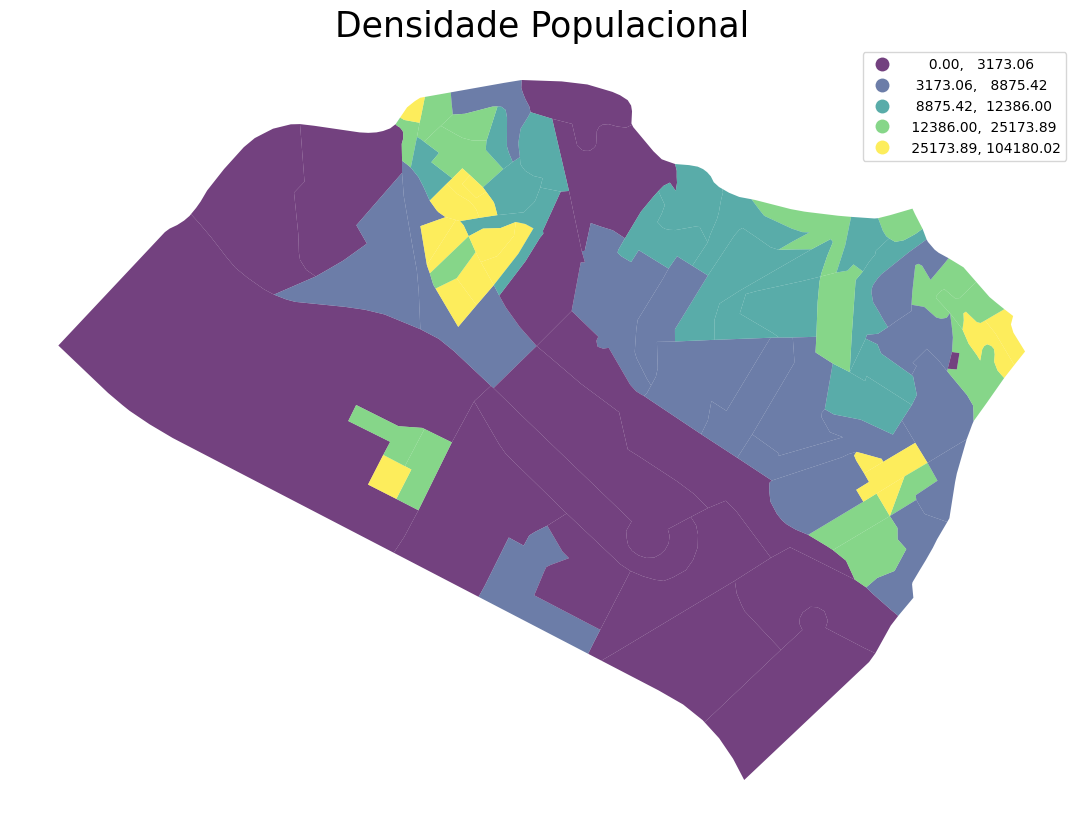

In [19]:
f, ax = plt.subplots(1, figsize=(20,10))

ap_cen.plot(column='Pop_Dns', cmap = 'viridis', scheme='quantiles', k = 5,
        edgecolor='white', linewidth=0.0, alpha=0.75, legend=True, ax=ax)
ax.set_axis_off()
ax.set_title('Densidade Populacional', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.show()